In [26]:
import hoomd
import hoomd.md

In [27]:
hoomd.context.initialize("")

In [28]:
snapshot = hoomd.data.make_snapshot(N=10,
                                    box=hoomd.data.boxdim(Lx=10, Ly=0.5, Lz=0.5),
                                    particle_types=['A', 'B'],
                                    bond_types=['polymer']);

N=10, meaning the box is 10 "cells" long
when we set the boxdim, Lx=10, Ly=0.5, Lz=0.5
I can kind of understand why Lx would be 10, but it throws me off when Ly and Lz are 0.5. Why wouldn't they all be the same values?

Lx, Ly, Lz = moment of inertia?

In [29]:
snapshot.particles.position[:] = [[-4.5, 0, 0], [-3.5, 0, 0],
                                  [-2.5, 0, 0], [-1.5, 0, 0],
                                  [-0.5, 0, 0], [0.5, 0, 0],
                                  [1.5, 0, 0], [2.5, 0, 0],
                                  [3.5, 0, 0], [4.5, 0, 0]]

If I'm being completely honest, this section makes no sense to me. 
We set the particles position here, how do we know where they will go? which particles are we setting?

In [30]:
snapshot.particles.typeid[0:7]=0
snapshot.particles.typeid[7:10]=1

My understanding of this:
    There are two types of particles, A and B.
    In this cell we are defining where they are going to be in columns.
    Type A is from 0:7, Type B is from 7:10
    
Questions:
    Does the 0 and 1 represent the different particles, A and B?

In [31]:
snapshot.bonds.resize(9)
snapshot.bonds.group[:] = [[0,1], [1, 2], [2,3],
                           [3,4], [4,5], [5,6],
                           [6,7], [7,8], [8,9]]

In [32]:
snapshot.replicate(1,20,20)

In [33]:
import numpy
snapshot.particles.velocity[:] = numpy.random.normal(0.0,
  numpy.sqrt(0.8 / 1.0), [snapshot.particles.N, 3])

In [34]:
hoomd.init.read_snapshot(snapshot)

notice(2): Group "all" created containing 4000 particles


In [10]:
nl = hoomd.md.nlist.cell()

In [11]:
dpd = hoomd.md.pair.dpd(r_cut=1.0, nlist=nl, kT=0.8, seed=1)

-----
You are using DPD. Please cite the following:
* C L Phillips, J A Anderson, and S C Glotzer. "Pseudo-random number generation
  for Brownian Dynamics and Dissipative Particle Dynamics simulations on GPU
  devices", Journal of Computational Physics 230 (2011) 7191--7201
-----


In [12]:
dpd.pair_coeff.set('A', 'A', A=25.0, gamma = 1.0)
dpd.pair_coeff.set('A', 'B', A=100.0, gamma = 1.0)
dpd.pair_coeff.set('B', 'B', A=25.0, gamma = 1.0)

In [13]:
nl.reset_exclusions(exclusions = [])

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 4000
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no


In [14]:
harmonic = hoomd.md.bond.harmonic()

In [15]:
harmonic.bond_coeff.set('polymer', k=100.0, r0=0)

In [16]:
hoomd.md.integrate.mode_standard(dt=0.01)

In [17]:
all = hoomd.group.all()
hoomd.md.integrate.nve(group=all)

In [18]:
hoomd.analyze.log(filename="log-output.log",
                 quantities=['potential_energy', 'temperature'],
                 period=500,
                 overwrite=True)

In [19]:
hoomd.dump.gsd("trajectory.gsd", period=10e3, group=all, overwrite=True);

In [20]:
hoomd.run(5e4)

** starting run **
Time 00:03:42 | Step 183 / 50000 | TPS 18.2089 | ETA 00:45:35
Time 00:03:52 | Step 501 / 50000 | TPS 31.6557 | ETA 00:26:03
Time 00:04:02 | Step 907 / 50000 | TPS 40.553 | ETA 00:20:10
Time 00:04:12 | Step 1359 / 50000 | TPS 45.1705 | ETA 00:17:56
Time 00:04:22 | Step 1806 / 50000 | TPS 44.6367 | ETA 00:17:59
Time 00:04:32 | Step 2242 / 50000 | TPS 43.5897 | ETA 00:18:15
Time 00:04:42 | Step 2687 / 50000 | TPS 44.4392 | ETA 00:17:44
Time 00:04:52 | Step 3147 / 50000 | TPS 45.8939 | ETA 00:17:00
Time 00:05:02 | Step 3604 / 50000 | TPS 45.6387 | ETA 00:16:56
Time 00:05:12 | Step 4046 / 50000 | TPS 44.1635 | ETA 00:17:20
Time 00:05:22 | Step 4470 / 50000 | TPS 42.3925 | ETA 00:17:54
Time 00:05:32 | Step 4908 / 50000 | TPS 43.7731 | ETA 00:17:10
Time 00:05:42 | Step 5354 / 50000 | TPS 44.5729 | ETA 00:16:41
Time 00:05:52 | Step 5804 / 50000 | TPS 44.9809 | ETA 00:16:22
Time 00:06:02 | Step 6260 / 50000 | TPS 45.4856 | ETA 00:16:01
Time 00:06:12 | Step 6722 / 50000 | TPS 

In [21]:
import numpy
from matplotlib import pyplot
%matplotlib inline
data = numpy.genfromtxt(fname='log-output.log', skip_header=True)

Text(0,0.5,'potential_energy')

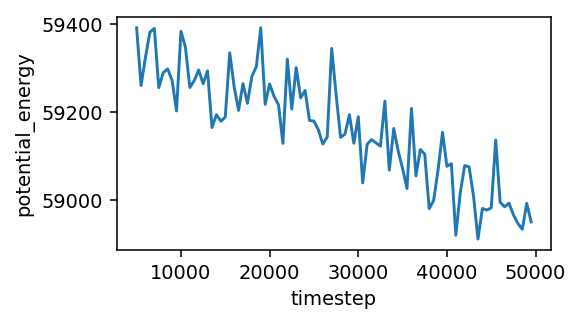

In [22]:
pyplot.figure(figsize=(4,2.2), dpi=140)
pyplot.plot(data[10:,0], data[10:,1])
pyplot.xlabel('timestep')
pyplot.ylabel('potential_energy')
              

Text(0,0.5,'temperature')

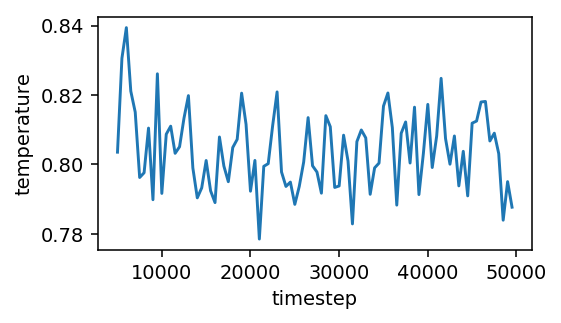

In [23]:
pyplot.figure(figsize=(4,2.2), dpi=140)
pyplot.plot(data[10:,0], data[10:,2])
pyplot.xlabel('timestep')
pyplot.ylabel('temperature')

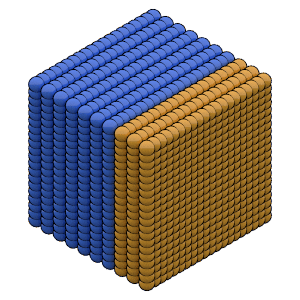

In [24]:
import ex_render
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory.gsd')